## KC Ev fiyatları

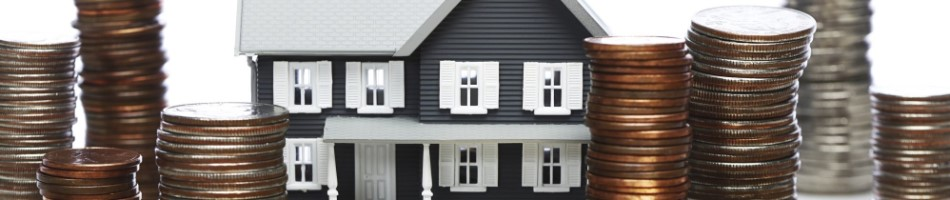

Bu uyuglamada KC House veri seini kullnaarak ev fiyatlarını tahmin eden bir model oluşturmak amaçlanmıştır.

Veri Seti: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

## Kütüphanelerin Yüklenmesi

In [1]:
import pandas as pd

## Veri Setinin Yüklenmesi

In [2]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 4821-D018

 Directory of C:\Users\emura\Documents\BTK24Nisan\GUN4

18.05.2024  15:35    <DIR>          .
11.05.2024  10:03    <DIR>          ..
11.05.2024  15:16    <DIR>          .ipynb_checkpoints
18.05.2024  15:14    <DIR>          __pycache__
19.02.2024  21:11             4.063 advertising.csv
17.05.2024  00:41             2.341 all_reg_models.py
11.05.2024  14:59           139.968 €oklu Do§rusal Regresyon (Multiple Linear Regression).ipynb
11.05.2024  11:01             1.201 file_to_speech.ipynb
11.05.2024  11:01               527 file_to_speech.py
11.05.2024  10:15            26.016 hi_accent.mp3
18.05.2024  15:35           875.872 KC Ev Fiyatlar� Tahmin.ipynb
17.02.2024  08:21         2.515.206 kc_house_data.csv
11.05.2024  11:11            69.984 Merha.mp3
11.05.2024  10:14            25.056 ses1.mp3
11.05.2024  10:44            13.138 Seslendirme.ipynb
11.05.2024  10:26               205 seslendirme_metni.txt
11.05.2024  1

In [3]:
df=pd.read_csv('kc_house_data.csv')

## Keşifsel Veri Analizi

In [4]:
# Pandas tüm sütunları göster
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<Axes: ylabel='Frequency'>

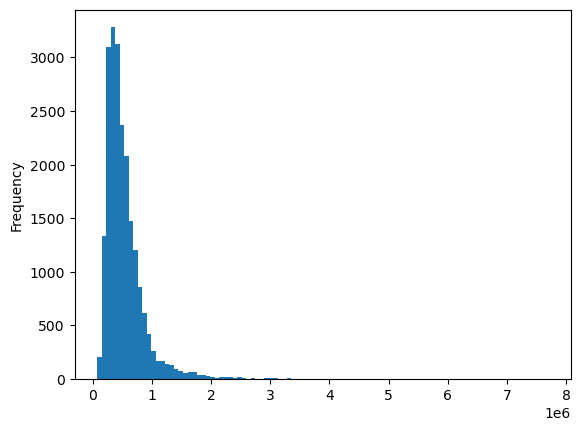

In [7]:
df['price'].plot(kind='hist', bins=100)

In [8]:
df.shape

(21613, 21)

In [9]:
# en pahalı ev
df['price'].max()

7700000.0

In [10]:
df[df['price'] == df['price'].max()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.0,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800


In [11]:
df.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [12]:
df2=df.copy()

In [13]:
# En çok banyo sayısı
df.bathrooms.max()

8.0

In [14]:
df.corr(numeric_only=True)['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

<Axes: >

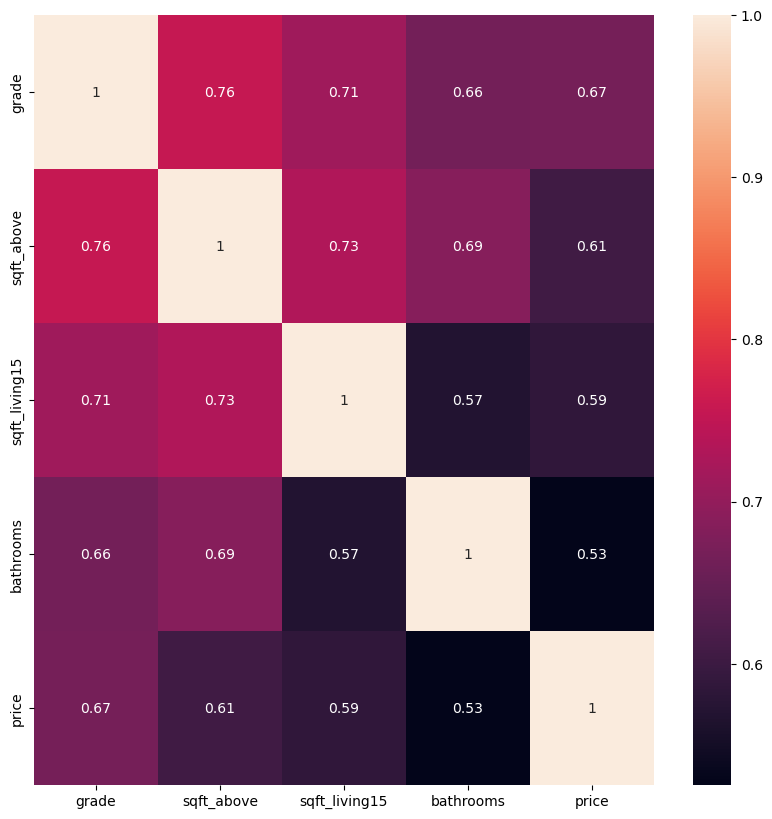

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(df[['grade', 'sqft_above', 
               'sqft_living15', 'bathrooms','price']].corr(numeric_only=True),annot=True)


## Data Preprocessing Veri ön işleme

In [16]:
# min banyo sayısı
df.bathrooms.min()

0.0

Normal dağılımda 3Sd +- verilerin %99.6 sını kapsar.

Geriye kalan % .4 ü ayrkırı değerlerdir. 

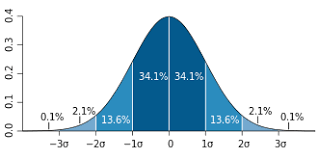

In [17]:
df_bedrooms_outliers_max=df2[df2['bedrooms']>df2['bedrooms'].mean()+3*df2['bedrooms'].std()]

In [18]:
df_bedrooms_outliers_max

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
556,5486800070,20140620T000000,1950000.0,7,3.50,4640,15235,2.0,0,1,3,11,2860,1780,1965,2003,98040,47.5666,-122.231,3230,20697
1135,4024100951,20150105T000000,420000.0,7,3.00,2940,8624,1.0,0,0,3,8,1690,1250,1977,0,98155,47.7555,-122.307,1850,8031
1241,7227802030,20140623T000000,350000.0,7,3.00,2800,9569,1.0,0,2,3,7,1400,1400,1963,0,98056,47.5102,-122.183,2150,7333
1660,9126101740,20141204T000000,490000.0,8,5.00,2800,2580,2.0,0,0,3,8,1880,920,1997,0,98122,47.6086,-122.303,1800,2580
3721,5451100490,20150115T000000,884900.0,7,4.75,5370,10800,1.5,0,0,3,8,5370,0,1967,0,98040,47.5380,-122.223,2310,10910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18823,4040500100,20141020T000000,539000.0,7,2.25,2620,6890,2.0,0,0,4,7,2620,0,1961,0,98007,47.6123,-122.134,2070,7910
18975,1778360150,20140620T000000,1240000.0,7,5.50,6630,13782,2.0,0,0,3,10,4930,1700,2004,0,98006,47.5399,-122.118,4470,8639
19254,8812401450,20141229T000000,660000.0,10,3.00,2920,3745,2.0,0,0,4,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745
19302,3756900027,20141125T000000,575000.0,8,3.00,3840,15990,1.0,0,0,3,7,2530,1310,1961,0,98034,47.7111,-122.211,1380,8172


min değer için .6 çıktığından dolayı (yarım yatak odası) 

In [19]:
df_bedrooms_outliers_min=df2[df2['bedrooms']<df2['bedrooms'].mean()-3*df2['bedrooms'].std()]

In [20]:
df_bedrooms_outliers_min

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,20140612T000000,1095000.0,0,0.00,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
3119,3918400017,20150205T000000,380000.0,0,0.00,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
3467,1453602309,20140805T000000,288000.0,0,1.50,1430,1650,3.0,0,0,3,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
4868,6896300380,20141002T000000,228000.0,0,1.00,390,5900,1.0,0,0,2,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
6994,2954400190,20140624T000000,1295650.0,0,0.00,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
8477,2569500210,20141117T000000,339950.0,0,2.50,2290,8319,2.0,0,0,3,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751
8484,2310060040,20140925T000000,240000.0,0,2.50,1810,5669,2.0,0,0,3,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685
9773,3374500520,20150429T000000,355000.0,0,0.00,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,7849202190,20141223T000000,235000.0,0,0.00,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
12653,7849202299,20150218T000000,320000.0,0,2.50,1490,7111,2.0,0,0,3,7,1490,0,1999,0,98065,47.5261,-121.826,1500,4675


In [21]:
len (df_bedrooms_outliers_min)

13

In [22]:
#df.drop(df.index[df['bedrooms']>df['bedrooms'].mean()+3*df['bedrooms'].std()],inplace=True)
#df.drop(df.index[df['bedrooms']<df['bedrooms'].mean()-3*df['bedrooms'].std()],inplace=True)

## 2. Quantile Yöntemi

In [23]:
df_kor=df[['price','bedrooms','bathrooms','sqft_living','sqft_lot']]

In [24]:
outliers2=df_kor.quantile(q=0.99)

In [25]:
outliers2.head()

price          1964400.00
bedrooms             6.00
bathrooms            4.25
sqft_living       4978.80
sqft_lot        213008.00
Name: 0.99, dtype: float64

In [26]:
df3=df2[df2['price']<outliers2['price']]

In [27]:
df3.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.139600e+04,2.139600e+04,21396.000000,21396.000000,21396.000000,2.139600e+04,21396.000000,21396.000000,21396.000000,21396.000000,21396.000000,21396.000000,21396.000000,21396.000000,21396.000000,21396.000000,21396.000000,21396.000000,21396.000000,21396.000000
mean,4.586696e+09,5.181153e+05,3.360909,2.097460,2050.491400,1.499324e+04,1.490512,0.005328,0.216255,3.408254,7.626239,1766.210273,284.281127,1970.989250,82.271593,98078.083333,47.559458,-122.213655,1971.608058,12696.709712
std,2.877291e+09,2.845875e+05,0.923862,0.746921,861.406875,4.097949e+04,0.539255,0.072801,0.729263,0.649551,1.135380,791.592670,430.401009,29.307383,396.793784,53.470361,0.139050,0.141226,668.096205,27203.764165
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.124547e+09,3.200000e+05,3.000000,1.500000,1420.000000,5.026000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.750000,0.000000,98033.000000,47.469075,-122.329000,1480.000000,5100.000000
50%,3.905000e+09,4.500000e+05,3.000000,2.250000,1900.000000,7.575500e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1550.000000,0.000000,1975.000000,0.000000,98065.000000,47.570700,-122.230000,1830.000000,7600.000000
75%,7.320653e+09,6.350000e+05,4.000000,2.500000,2520.000000,1.054850e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2190.000000,550.000000,1997.000000,0.000000,98118.000000,47.678400,-122.124000,2340.000000,10021.250000
max,9.900000e+09,1.960000e+06,33.000000,7.500000,7730.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,7420.000000,3260.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,871200.000000


In [28]:
df3=df3[df3['bedrooms']<outliers2['bedrooms']]

In [29]:
df3.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.108300e+04,2.108300e+04,21083.000000,21083.000000,21083.000000,2.108300e+04,21083.000000,21083.000000,21083.000000,21083.000000,21083.000000,21083.000000,21083.000000,21083.000000,21083.000000,21083.000000,21083.000000,21083.000000,21083.000000,21083.000000
mean,4.589337e+09,5.154680e+05,3.316274,2.083159,2033.658540,1.495866e+04,1.488996,0.005312,0.213395,3.407722,7.621923,1756.632927,277.025613,1971.121045,80.937533,98078.052981,47.559091,-122.213244,1968.303847,12681.053503
std,2.878121e+09,2.827383e+05,0.829420,0.732657,847.645232,4.105184e+04,0.539448,0.072694,0.724074,0.649273,1.134268,785.525479,421.896088,29.288950,393.702090,53.464094,0.139301,0.141618,666.228436,27127.443789
min,1.200019e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.125049e+09,3.200000e+05,3.000000,1.500000,1410.000000,5.015000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1952.000000,0.000000,98033.000000,47.467800,-122.329000,1480.000000,5100.000000
50%,3.905030e+09,4.475000e+05,3.000000,2.250000,1890.000000,7.566000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1540.000000,0.000000,1975.000000,0.000000,98065.000000,47.570300,-122.229000,1830.000000,7600.000000
75%,7.334451e+09,6.300000e+05,4.000000,2.500000,2500.000000,1.050500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2170.000000,530.000000,1997.000000,0.000000,98118.000000,47.678450,-122.124000,2340.000000,10018.000000
max,9.900000e+09,1.960000e+06,5.000000,6.000000,7730.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,7420.000000,3260.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,871200.000000


In [30]:
df3=df3[df3['bathrooms']<outliers2['bedrooms']]
df3=df3[df3['sqft_living']<outliers2['sqft_living']]
df3=df3[df3['sqft_lot']<outliers2['sqft_lot']]
df3.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.077400e+04,2.077400e+04,20774.000000,20774.000000,20774.000000,20774.000000,20774.000000,20774.000000,20774.000000,20774.000000,20774.000000,20774.000000,20774.000000,20774.000000,20774.000000,20774.000000,20774.000000,20774.000000,20774.000000,20774.000000
mean,4.617201e+09,5.099878e+05,3.311254,2.070545,2008.980841,11713.006691,1.486040,0.005247,0.204968,3.409935,7.601232,1735.473910,273.506932,1970.880235,80.795658,98078.548185,47.559825,-122.215633,1955.816213,11031.837922
std,2.876712e+09,2.753241e+05,0.827587,0.718490,802.631011,18817.739040,0.539422,0.072247,0.709782,0.650089,1.109744,750.747988,413.987609,29.334521,393.369803,53.576531,0.138872,0.140006,651.499251,19116.131084
min,1.200019e+06,7.500000e+04,0.000000,0.000000,290.000000,520.000000,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.512000,399.000000,651.000000
25%,2.141500e+09,3.190000e+05,3.000000,1.500000,1410.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1951.000000,0.000000,98033.000000,47.469725,-122.330000,1480.000000,5060.000000
50%,3.959401e+09,4.450000e+05,3.000000,2.250000,1880.000000,7500.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1540.000000,0.000000,1974.000000,0.000000,98065.000000,47.570900,-122.234000,1820.000000,7551.000000
75%,7.345528e+09,6.250000e+05,4.000000,2.500000,2480.000000,10305.500000,2.000000,0.000000,0.000000,4.000000,8.000000,2150.000000,530.000000,1996.000000,0.000000,98118.000000,47.678800,-122.127000,2320.000000,9900.000000
max,9.900000e+09,1.960000e+06,5.000000,5.250000,4970.000000,212639.000000,3.500000,1.000000,4.000000,5.000000,13.000000,4930.000000,2350.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,434728.000000


In [31]:
df3.shape

(20774, 21)

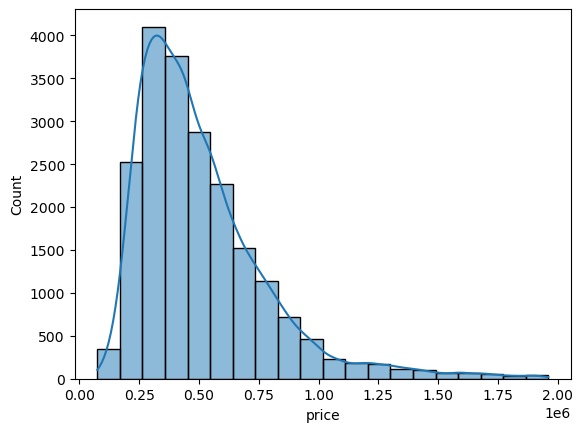

In [32]:
sns.histplot(df3['price'],bins=20,kde=True);

In [33]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
id,20774.0,4.617201e+09,2.876712e+09,1.200019e+06,2.141500e+09,3.959401e+09,7.345528e+09,9.900000e+09
price,20774.0,5.099878e+05,2.753241e+05,7.500000e+04,3.190000e+05,4.450000e+05,6.250000e+05,1.960000e+06
bedrooms,20774.0,3.311254e+00,8.275869e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
bathrooms,20774.0,2.070545e+00,7.184905e-01,0.000000e+00,1.500000e+00,2.250000e+00,2.500000e+00,5.250000e+00
sqft_living,20774.0,2.008981e+03,8.026310e+02,2.900000e+02,1.410000e+03,1.880000e+03,2.480000e+03,4.970000e+03
sqft_lot,20774.0,1.171301e+04,1.881774e+04,5.200000e+02,5.000000e+03,7.500000e+03,1.030550e+04,2.126390e+05
floors,20774.0,1.486040e+00,5.394222e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.500000e+00
waterfront,20774.0,5.246943e-03,7.224724e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,20774.0,2.049677e-01,7.097823e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,20774.0,3.409935e+00,6.500887e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [34]:
import datetime
import numpy as np

In [35]:
df3.zipcode.dtype

dtype('int64')

In [36]:
# Veri tipini dönüştür
df3['zipcode'] = df3['zipcode'].astype('category')

In [37]:
df3.zipcode.dtype

CategoricalDtype(categories=[98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008,
                  98010, 98011, 98014, 98019, 98022, 98023, 98024, 98027,
                  98028, 98029, 98030, 98031, 98032, 98033, 98034, 98038,
                  98039, 98040, 98042, 98045, 98052, 98053, 98055, 98056,
                  98058, 98059, 98065, 98070, 98072, 98074, 98075, 98077,
                  98092, 98102, 98103, 98105, 98106, 98107, 98108, 98109,
                  98112, 98115, 98116, 98117, 98118, 98119, 98122, 98125,
                  98126, 98133, 98136, 98144, 98146, 98148, 98155, 98166,
                  98168, 98177, 98178, 98188, 98198, 98199],
, ordered=False)

In [38]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20774 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             20774 non-null  int64   
 1   date           20774 non-null  object  
 2   price          20774 non-null  float64 
 3   bedrooms       20774 non-null  int64   
 4   bathrooms      20774 non-null  float64 
 5   sqft_living    20774 non-null  int64   
 6   sqft_lot       20774 non-null  int64   
 7   floors         20774 non-null  float64 
 8   waterfront     20774 non-null  int64   
 9   view           20774 non-null  int64   
 10  condition      20774 non-null  int64   
 11  grade          20774 non-null  int64   
 12  sqft_above     20774 non-null  int64   
 13  sqft_basement  20774 non-null  int64   
 14  yr_built       20774 non-null  int64   
 15  yr_renovated   20774 non-null  int64   
 16  zipcode        20774 non-null  category
 17  lat            20774 non-null  float

In [39]:
# unique değerler
df3.zipcode.unique()

[98178, 98125, 98028, 98136, 98074, ..., 98072, 98188, 98014, 98055, 98039]
Length: 70
Categories (70, int64): [98001, 98002, 98003, 98004, ..., 98178, 98188, 98198, 98199]

In [40]:
# Özellik dönüşümleri
df3.bedrooms=df3.bedrooms**2 # yatak odası sayısının ev fiyatı üzerine ağırlığı fazla olduğu için

In [41]:
df3.bathrooms=df3.bathrooms**2

In [42]:
df3.sqft_living=df3.sqft_living**2

In [43]:
df3['age']=2015-df3.yr_built

In [44]:
df3['age']

0        60
1        64
2        82
3        50
4        28
         ..
21608     6
21609     1
21610     6
21611    11
21612     7
Name: age, Length: 20774, dtype: int64

In [45]:
df3.age.max()

115

In [46]:
df3[df3['age']==115]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
14,1175000570,20150312T000000,530000.0,25,4.0000,3276100,4850,1.5,0,0,3,7,1810,0,1900,0,98107,47.6700,-122.394,1360,4850,115
115,3626039325,20141121T000000,740500.0,9,12.2500,19184400,6350,2.0,0,0,3,8,2780,1600,1900,1999,98117,47.6981,-122.368,1830,6350,115
498,9274202270,20140818T000000,625000.0,4,2.2500,2220100,5750,1.5,0,0,4,7,1190,300,1900,0,98116,47.5872,-122.390,1590,4025,115
537,5694500105,20141204T000000,595000.0,4,4.0000,2280100,4000,1.0,0,0,4,7,1010,500,1900,0,98103,47.6582,-122.345,1920,4000,115
703,7011200260,20141219T000000,485000.0,16,4.0000,1960000,3600,1.0,0,0,3,7,1100,300,1900,0,98119,47.6385,-122.370,1630,2048,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19063,1702901340,20140613T000000,718500.0,9,4.0000,8468100,6600,2.0,0,0,4,7,1920,990,1900,1988,98118,47.5576,-122.281,1370,5500,115
19137,3388110230,20140729T000000,179000.0,16,3.0625,3204100,7175,1.5,0,0,3,6,1410,380,1900,0,98168,47.4963,-122.318,1790,8417,115
19319,4083302225,20141014T000000,850000.0,16,9.0000,6502500,3784,1.5,0,0,4,8,1750,800,1900,0,98103,47.6559,-122.338,2100,4560,115
19385,2420069042,20150424T000000,240000.0,9,4.0000,2411809,6550,1.0,0,0,3,7,1553,0,1900,2001,98022,47.2056,-121.994,1010,10546,115


In [47]:
# restorasyon
#df3['renovated']=df3['yr_renovated'].apply(lambda x: 0 if x==0 else 1)
df3['yr_renovated'].max()

2015

In [48]:
# renovated yapılmış yapılmış
df3['yr_renovated']=np.where(df3['yr_renovated']==0,0,1)#np.where

In [49]:
df3['renovated']=df3['yr_renovated']
df3.drop('yr_renovated',axis=1,inplace=True)

In [50]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20774 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             20774 non-null  int64   
 1   date           20774 non-null  object  
 2   price          20774 non-null  float64 
 3   bedrooms       20774 non-null  int64   
 4   bathrooms      20774 non-null  float64 
 5   sqft_living    20774 non-null  int64   
 6   sqft_lot       20774 non-null  int64   
 7   floors         20774 non-null  float64 
 8   waterfront     20774 non-null  int64   
 9   view           20774 non-null  int64   
 10  condition      20774 non-null  int64   
 11  grade          20774 non-null  int64   
 12  sqft_above     20774 non-null  int64   
 13  sqft_basement  20774 non-null  int64   
 14  yr_built       20774 non-null  int64   
 15  zipcode        20774 non-null  category
 16  lat            20774 non-null  float64 
 17  long           20774 non-null  float

In [51]:
#Bodrum var yok
df3['sqft_basement']=np.where(df3['sqft_basement']==0,0,1)

In [52]:
df3['sqft_basement']

0        0
1        1
2        0
3        1
4        0
        ..
21608    0
21609    0
21610    0
21611    0
21612    0
Name: sqft_basement, Length: 20774, dtype: int32

In [53]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20774 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             20774 non-null  int64   
 1   date           20774 non-null  object  
 2   price          20774 non-null  float64 
 3   bedrooms       20774 non-null  int64   
 4   bathrooms      20774 non-null  float64 
 5   sqft_living    20774 non-null  int64   
 6   sqft_lot       20774 non-null  int64   
 7   floors         20774 non-null  float64 
 8   waterfront     20774 non-null  int64   
 9   view           20774 non-null  int64   
 10  condition      20774 non-null  int64   
 11  grade          20774 non-null  int64   
 12  sqft_above     20774 non-null  int64   
 13  sqft_basement  20774 non-null  int32   
 14  yr_built       20774 non-null  int64   
 15  zipcode        20774 non-null  category
 16  lat            20774 non-null  float64 
 17  long           20774 non-null  float

## Özellikleri ve hedefi belirle (X, y)

In [54]:
y=df3['price'] # hedef /bağımlı değişken
X=df3.drop(['price', 'date','id','lat','long'],axis=1) #ö<eellikler, bağımsız değişkenler

## Kategorik Verileri Sayısal verilere Çevir

In [55]:
X=pd.get_dummies(X,columns=['zipcode'],drop_first=True)
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,age,renovated,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,9,1.0000,1392400,5650,1.0,0,0,3,7,1180,0,1955,1340,5650,60,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,9,5.0625,6604900,7242,2.0,0,0,3,7,2170,1,1951,1690,7639,64,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,4,1.0000,592900,10000,1.0,0,0,3,6,770,0,1933,2720,8062,82,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,16,9.0000,3841600,5000,1.0,0,0,5,7,1050,1,1965,1360,5000,50,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,9,4.0000,2822400,8080,1.0,0,0,3,8,1680,0,1987,1800,7503,28,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,9,6.2500,2340900,1131,3.0,0,0,3,8,1530,0,2009,1530,1509,6,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

## Standard Scaler ile Ölçekleme

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
scaler=StandardScaler()

In [58]:
X_scaler=scaler.fit_transform(X)

## Veri setini eğitim ve test olarak ayır

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=.2, random_state=42)

## Modelleme

In [60]:
from all_reg_models import all_reg_models

In [61]:
all_reg_models(X_train, X_test, y_train, y_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005609 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1784
[LightGBM] [Info] Number of data points in the train set: 16619, number of used features: 85
[LightGBM] [Info] Start training from score 510645.277454
Linear Regression: Average RMSE: 112405.63
Linear Regression: R2: 0.83
Decision Tree: Average RMSE: 158976.97
Decision Tree: R2: 0.66
Random Forest: Average RMSE: 118003.84
Random Forest: R2: 0.81
Gradient Boosting: Average RMSE: 128420.83
Gradient Boosting: R2: 0.78
XGBoost: Average RMSE: 105697.58
XGBoost: R2: 0.85
LightGBM: Average RMSE: 104442.25
LightGBM: R2: 0.85
Ridge: Average RMSE: 112405.01
Ridge: R2: 0.83
Lasso: Average RMSE: 112405.37
Lasso: R2: 0.83
ElasticNet: Average RMSE: 126029.45
ElasticNet: R2: 0.79
KNeighborsRegressor: Average RMSE: 114003.31
KNeighborsRegressor: 

C:\Users\emura\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [62]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
lgbm_model = LGBMRegressor()
lgbm_model.fit(X_train, y_train)
y_pred = lgbm_model.predict(X_test)
r2=np.sqrt(mean_squared_error(y_test, y_pred))
print('R2 score: ', r2)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007003 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1784
[LightGBM] [Info] Number of data points in the train set: 16619, number of used features: 85
[LightGBM] [Info] Start training from score 510645.277454
R2 score:  104442.25299579177


In [63]:
#Katsayılar ile df sütın adlarını ziple
sütunlar = X.columns
lgbm_model.feature_importances_

pd.DataFrame({'sütun adı': sütunlar, 'katsayı': lgbm_model.feature_importances_}).sort_values('katsayı', ascending=False)

,sütun adı,katsayı
11,yr_built,280
2,sqft_living,206
12,sqft_living15,193
13,sqft_lot15,161
3,sqft_lot,160
...,...,...
24,zipcode_98011,2
77,zipcode_98155,1
29,zipcode_98024,0
31,zipcode_98028,0
